- 이 튜토리얼에서는 대부분의 분석에서 처리해야하는 주요 아티팩트 두 가지에 대해 설명하고 이를 감지하는 방법을 보여줍니다.

In [12]:
import mne

from mne.datasets import sample
from mne.preprocessing import create_ecg_epochs, create_eog_epochs

# getting some data ready
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'

raw = mne.io.read_raw_fif(raw_fname, preload=True)

Opening raw data file C:\Users\rkm14\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


In [13]:
(raw.copy().pick_types(meg='mag')
           .del_proj(0)
           .plot(duration=60, n_channels=100, remove_dc=False))

<Figure size 640x480 with 5 Axes>

<Figure size 640x480 with 5 Axes>

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


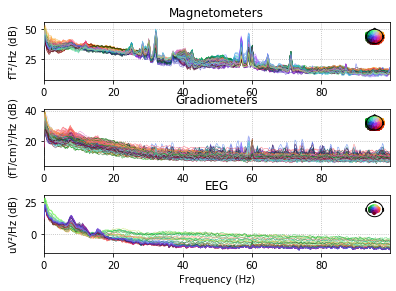

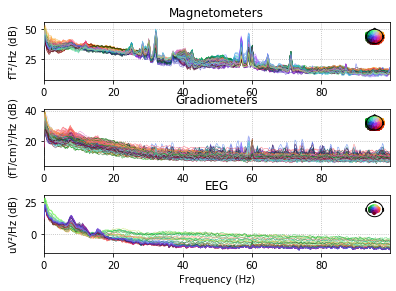

In [20]:
raw.plot_psd(fmax=100)  # fmax 주파수의 가장 높은 정도

- MEG 센서에서는 라인 노이즈와 관련하여 60, 120, 180, 240 Hz에서 좁은 주파수 피크가 나타납니다. 그러나 ECG와 같은 다른 생물학적 인공물을 암시하는 25 ~ 32Hz 사이의 높은 진폭 신호도 있습니다. MNE 헬퍼 기능을 사용하여 시간 영역에서 가장 쉽게 감지 할 수 있습니다.

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Number of ECG events detected : 283 (average pulse 61 / min.)
283 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 283 events and 601 original time points ...
0 bad epochs dropped
We found 283 ECG events


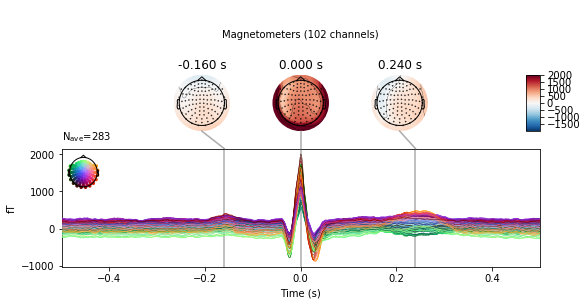

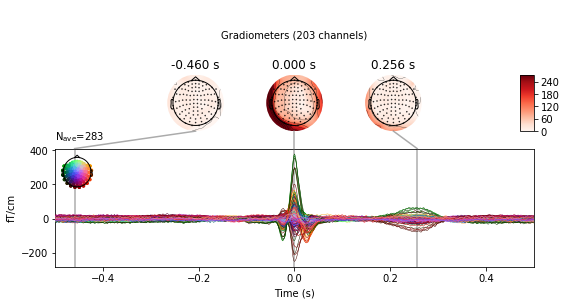

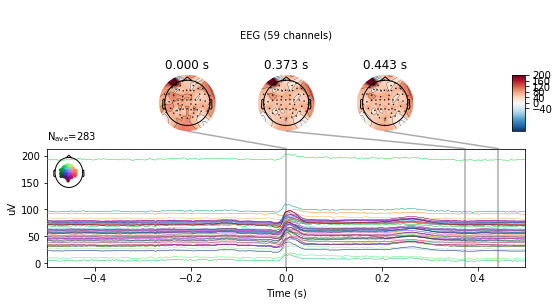

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [18]:
average_ecg = create_ecg_epochs(raw).average()
print('We found %i ECG events' % average_ecg.nave)
average_ecg.plot_joint()


- 일반적인 인공물 관련 신호의 크기 순서가 아닌 일반적인 시간 과정과 비 양극성 지형을 볼 수 있으며이를 뇌 신호에 대해 관찰 한 것과 비교할 수 있습니다.

EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected : 46
46 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 46 events and 601 original time points ...
0 bad epochs dropped
We found 46 EOG events


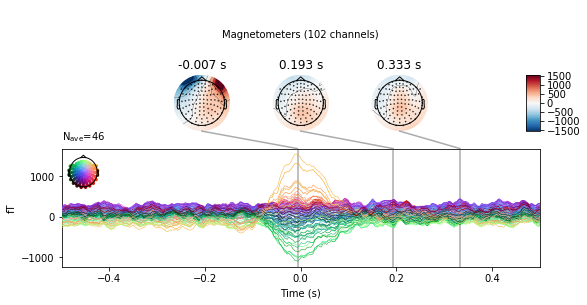

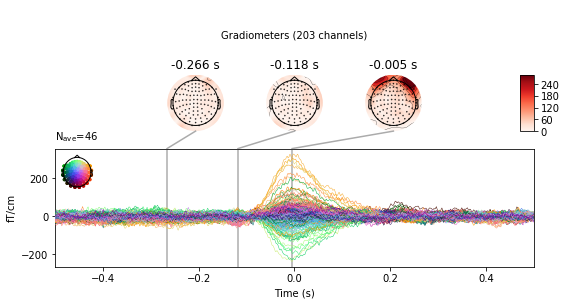

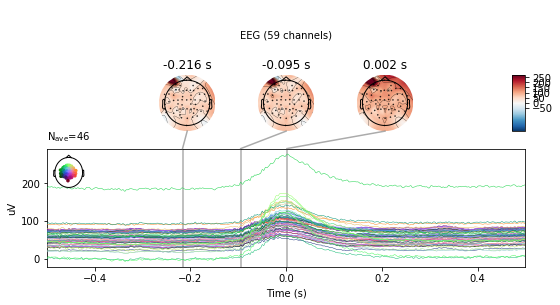

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [16]:
average_eog = create_eog_epochs(raw).average()
print('We found %i EOG events' % average_eog.nave)
average_eog.plot_joint()

- ssp ica와 같은 아티팩트 제거 기술의 품질을 판단할 때 이러한 아티팩트 패턴을 아는것이 가장 중요합니다. 일반적으로 관신있는 신호 보다 더 큰 아티팩트 진폭 차수를 필요로 하며, 아티팩트와 관련된 패턴을 추정하고 제거할 수 있는 분해를 찾기 위해 이러한 이벤트가 필요합니다. 